In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
FILE_PATH = 'C:\\Users\\gorodinskiy\\Desktop\\names\\'

making_path = lambda year:f'{FILE_PATH}yob{year}.txt'

## Задача №1 

Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

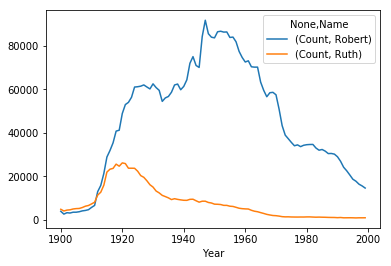

In [6]:
names_by_year = {}
for year in range(1900, 2000, 1):
    names_by_year[year] = pd.read_csv(making_path(year), names=['Name','Gender','Count'])
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
names = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
names.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

## Задача №2 

Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)

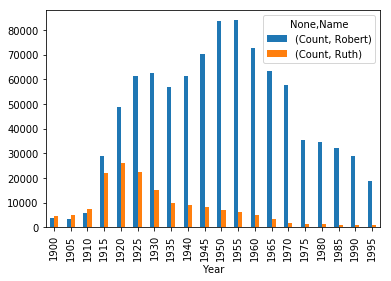

In [7]:
names_by_year = {}
for year in range(1900, 2000, 5):
    names_by_year[year] = pd.read_csv(making_path(year),names=['Name','Gender','Count'])
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
names = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
names.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

## Задача №3

Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

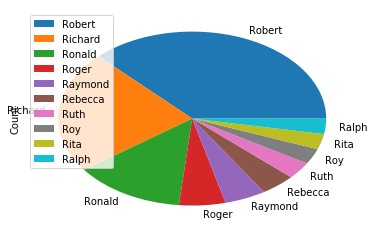

In [8]:
names = pd.read_csv(making_path(1950), names=['Name','Gender','Count'])
names = names[(names.Name.str.startswith('R'))]
names_pie = names.groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
names_pie.plot.pie(y='Count')

## Задача №4

Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [9]:
names_by_year  = {}
for year in range(1900, 2000, 1):
    names_by_year[year] = pd.read_csv(making_path(year),names=['Name','Gender','Count'])
names = pd.concat(names_by_year)
names.head(10)

Name Gender  Count
1900 0       Mary      F  16706
     1      Helen      F   6343
     2       Anna      F   6114
     3   Margaret      F   5304
     4       Ruth      F   4765
     5  Elizabeth      F   4096
     6   Florence      F   3920
     7      Ethel      F   3896
     8      Marie      F   3856
     9    Lillian      F   3414

""


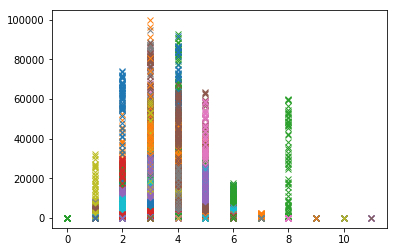

In [10]:
def scatter (group):
    plt.plot(group['Len'], group['Count'], 'x', label=group.name)
    
def consonants_count(str):
    i = 0
    for k in str:
        if not k in ['A', 'E', 'I', 'O', 'U', 'Y', 'a', 'e', 'i', 'o', 'u', 'y']:
            i += 1
    return i

names['Len'] = names.apply(lambda row: consonants_count(row.Name), axis=1)
names.groupby('Name').apply(scatter)